# 120 years of Olympic history

Dataset: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?resource=download

This is a dataset on the Olympics from 1896 to 2016. There are 270,767 rows & 17 columns with each row being an individual athlete.

Limitations:
* One issue I found was when calculating medals by country, team events cause duplication as each athlete is assigned the same medal in the dataset. This results in inflated medal counts for countries with many team events.
* Another issue I found was countries being miscoded due to historical changes in political boundaries and name changes. For example, the Soviet Union (USSR) dissolving in 1991 and Russia becoming an independent country and joining in 1994. When calculating medals by country, USSR is #2 and Russia is #8 when they should both fall under Russia as #2.


### I want to answer the following questions:
1. [Which countries have won the most medals?](#q1)
2. [Which countries have won the most gold medals?](#2)
3. [What is the age distribution of gold medals?](#3)
4. [Breakdown of medals by sex](#4)
5. [Number of participants over the years](#5)
6. [How many countries have been in all of the games?](#6)
7. [Which countries excel in specific sports?](#7)
8. [Which athletes have won the most gold medals?](#8)

# Step 1. Importing Python Libraries

In [258]:
{
    "tags": [
        "hide-cell"
    ]
}

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

# Step 2. Reading Dataset

In [182]:
# Import dataset from Kaggle

df1 = pd.read_csv(r'C:\Users\lksau\OneDrive\Documents\athlete_events.csv')
df2 = pd.read_csv(r'C:\Users\lksau\OneDrive\Documents\noc_regions.csv')

# Merge the datasets together

df = df1.merge(df2, on='NOC', how='inner')

# Step 3. Data Understanding
* Dataframe shape
* dtypes
* describe
* info
* heads and tail
* duplication
* missing values

In [184]:
df.shape

(270767, 17)

In [185]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

In [186]:
df.describe()

,ID,Age,Height,Weight,Year
count,270767.000000,261305.000000,210684.000000,207982.000000,270767.000000
mean,68229.276832,25.559783,175.344250,70.709523,1978.362297
std,39017.998824,6.392501,10.519556,14.350094,29.884637
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34630.500000,21.000000,168.000000,60.000000,1960.000000
50%,68187.000000,24.000000,175.000000,70.000000,1988.000000
75%,102065.500000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


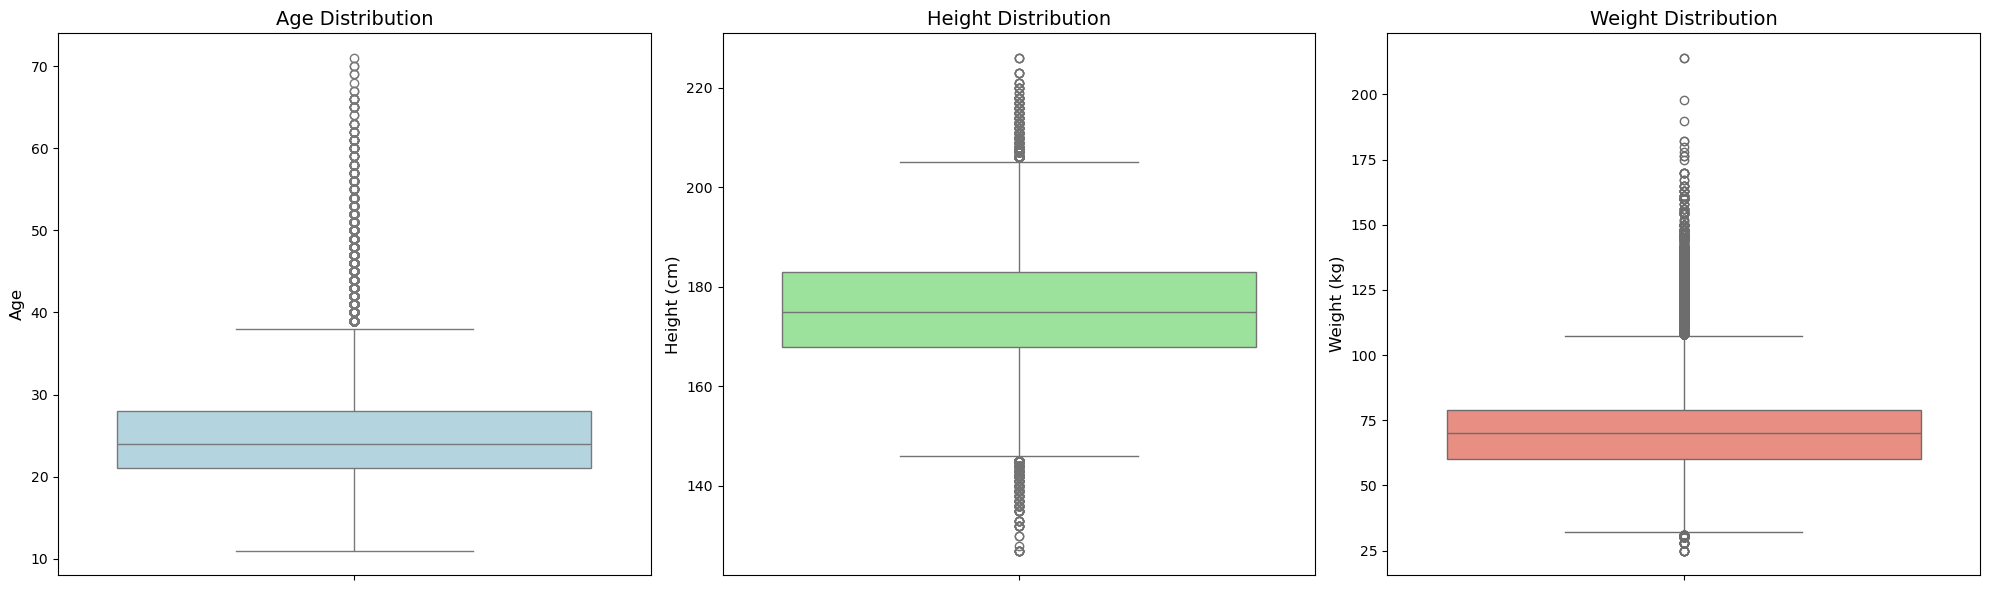

In [187]:
# Filter data for age, height, and weight, and drop missing values
age_height_weight_data = df[['Age', 'Height', 'Weight']].dropna()

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Boxplot for Age
sns.boxplot(data=age_height_weight_data, y='Age', ax=ax[0], color='lightblue')
ax[0].set_title('Age Distribution', fontsize=14)
ax[0].set_ylabel('Age', fontsize=12)
ax[0].set_xlabel('')

# Boxplot for Height
sns.boxplot(data=age_height_weight_data, y='Height', ax=ax[1], color='lightgreen')
ax[1].set_title('Height Distribution', fontsize=14)
ax[1].set_ylabel('Height (cm)', fontsize=12)
ax[1].set_xlabel('')

# Boxplot for Weight
sns.boxplot(data=age_height_weight_data, y='Weight', ax=ax[2], color='salmon')
ax[2].set_title('Weight Distribution', fontsize=14)
ax[2].set_ylabel('Weight (kg)', fontsize=12)
ax[2].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()

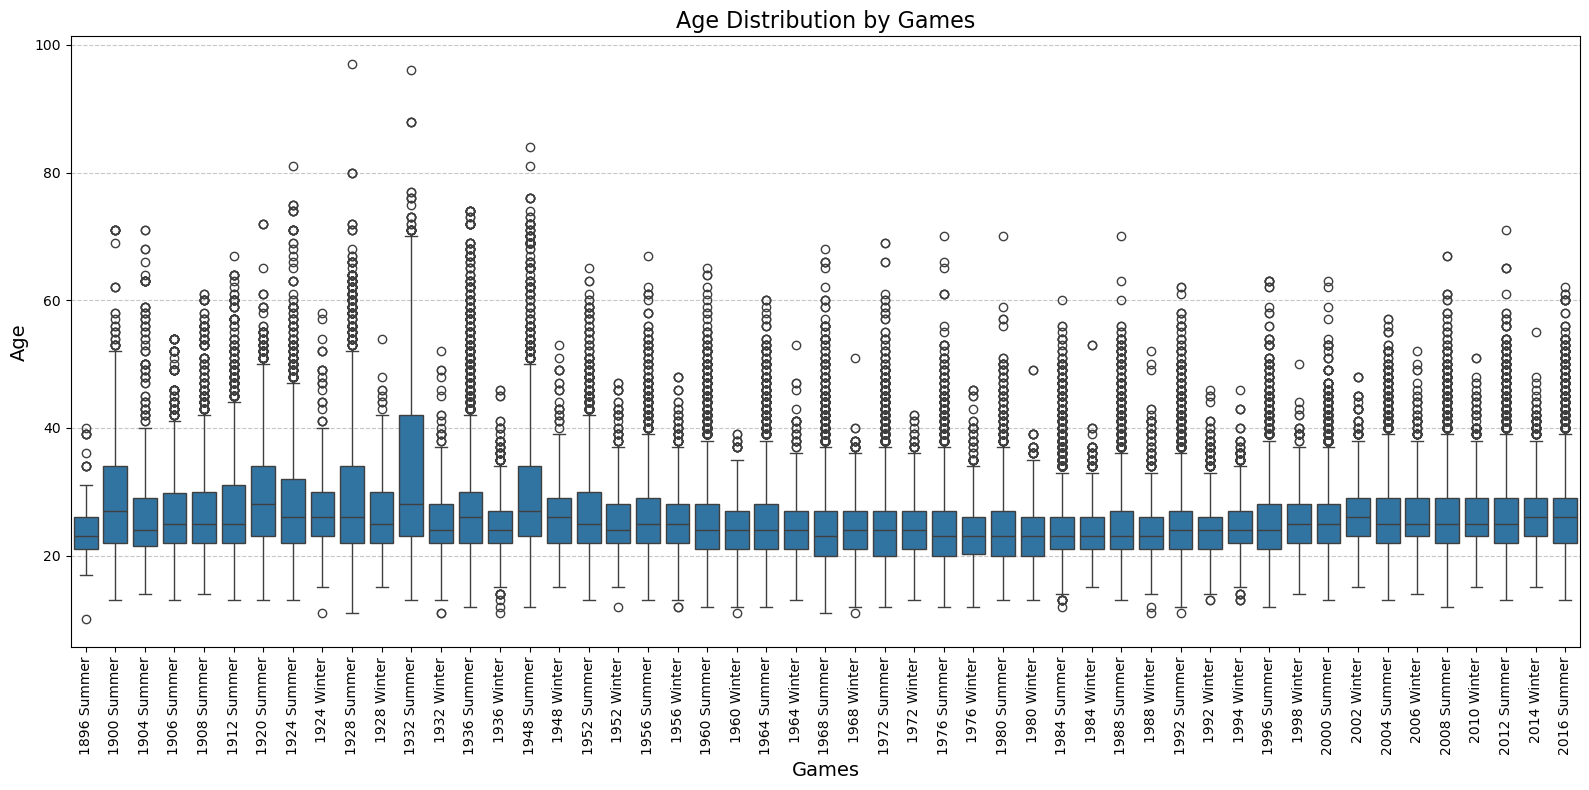

In [188]:
# Filter out missing age data
age_data = df.dropna(subset=['Age']).copy()

# Ensure the games column is sorted chronologically
age_data['Games'] = pd.Categorical(age_data['Games'], categories=sorted(age_data['Games'].unique()), ordered=True)

# Plot the boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=age_data, x='Games', y='Age')

# Customize the plot
plt.title('Age Distribution by Games', fontsize=16)
plt.xlabel('Games', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270767 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   39774 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.1+ MB


In [190]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [191]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [192]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
270762,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
270763,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
270764,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
270765,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
270766,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [193]:
df.nunique()

ID        135404
Name      134566
Sex            2
Age           74
Height        95
Weight       220
Team        1179
NOC          229
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
region       205
notes         21
dtype: int64

In [194]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
region        21
notes     265728
dtype: int64

In [195]:
(df.isnull().sum() / (len(df))) * 100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494517
Height    22.189927
Weight    23.187833
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.310618
region     0.007756
notes     98.138990
dtype: float64

# Step 4. Data Reduction

In [197]:
# Remove columns
df = df.drop(['notes', 'NOC', 'Team'], axis = 1)

# Dropping Team as this doesn't take into account of country name changes or political borders. Region will suffice.

In [198]:
# Check for duplicates
duplicates = df.loc[df.duplicated(keep=False)]
num_duplicates = df.duplicated().sum()

print(f"Duplicate Rows: {num_duplicates}")

# Remove duplicates
df = df.drop_duplicates()

# Reset index
df = df.reset_index(drop=True)

Duplicate Rows: 1398


# Step 5. Feature Engineering

In [200]:
# Add age_group column

# Define bins and labels for age group column
bins = [0, 18, 25, 30, 35, 40, 50, 100]
labels = ['Under 18', '18 - 25', '26 - 30', '31 - 35', '36 - 40', '41 - 50', '50+']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print(df['age_group'].value_counts())

age_group
18 - 25     118423
26 - 30      78738
31 - 35      31972
Under 18     12446
36 - 40      10449
41 - 50       6340
50+           1705
Name: count, dtype: int64


In [204]:
# Create a dictionary where each country maps to a list of cities
country_to_cities = {
    'USA': ['Los Angeles', 'Lake Placid', 'Salt Lake City', 'Squaw Valley', 'St. Louis'],
    'France': ['Albertville', 'Chamonix', 'Grenoble', 'Paris'],
    'Canada': ['Vancouver', 'Montreal', 'Calgary'],
    'Italy': ['Cortina d\'Ampezzo', 'Roma', 'Torino'],
    'Australia': ['Melbourne', 'Sydney'],
    'Japan': ['Nagano', 'Sapporo', 'Tokyo'],
    'Germany': ['Berlin', 'Garmisch-Partenkirchen', 'Munich'],
    'Russia': ['Moskva', 'Sochi'],
    'Brazil': ['Rio de Janeiro'],
    'Spain': ['Barcelona'],
    'China': ['Beijing'],
    'Netherlands': ['Amsterdam'],
    'Belgium': ['Antwerpen'],
    'Greece': ['Athina'],
    'Finland': ['Helsinki'],
    'Austria': ['Innsbruck'],
    'Norway': ['Lillehammer', 'Oslo'],
    'UK': ['London'],
    'Mexico': ['Mexico City'],
    'South Korea': ['Seoul'],
    'Switzerland': ['Sankt Moritz'],
    'Sweden': ['Stockholm'],
    'Yugoslavia': ['Sarajevo']
}

# Now create the city-to-country mapping by flattening the dictionary
city_to_country = {city: country for country, cities in country_to_cities.items() for city in cities}

# Map the host cities to their respective countries
df['host_country'] = df['City'].map(city_to_country)

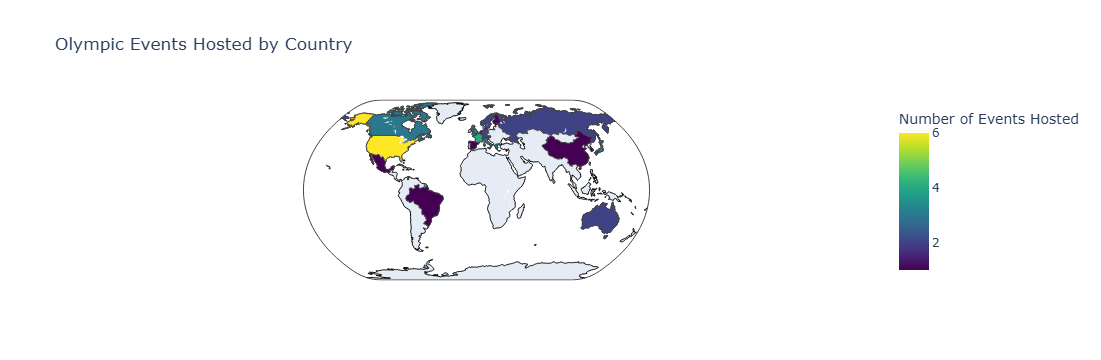

In [208]:
# Count the number of events hosted by each country
event_counts = df.groupby('host_country')['Year'].nunique().reset_index()
event_counts.columns = ['host_country', 'event_count']

# Create a choropleth map using Plotly
fig = px.choropleth(event_counts,
                    locations="host_country",
                    locationmode='country names',
                    color="event_count",
                    color_continuous_scale="viridis",  # Using a valid colorscale
                    labels={'event_count': 'Number of Events Hosted'},
                    title="Olympic Events Hosted by Country")

# Adjust map appearance
fig.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="natural earth")

# Display the map
fig.show()

# Step 6. Creating Features

# Step 7. Data Cleaning / Wrangling

In [210]:
# Clean column headers
df = df.rename(columns={'ID' : 'id',
                        'Name' : 'name',
                        'Sex' : 'sex',
                        'Age' : 'age',
                        'Height' : 'height',
                        'Weight' : 'weight',
                        'Games' : 'games',
                        'Team' : 'team',
                        'Year' : 'year',
                        'Season' : 'season',
                        'City' : 'host_city',
                        'Sport' : 'sport',
                        'Event' : 'event',
                        'Medal' : 'medal',
                       })

In [212]:
# Convert data types

# df['age'] = df['age'].astype('int32')

# Step 8. EDA Exploratory Data Analysis

In [215]:
# Create a copy table of gold medal
gold_medals = df[df['medal'] == 'Gold'].copy()

# Create a copy table of unique medals by event, year & region

### 1. Which countries have won the most medals? <a id="q1"></a>

In [218]:
unique_medals = df[['year', 'region', 'event', 'medal']].drop_duplicates()

medals_by_country = unique_medals.groupby(['region', 'medal']).size().unstack(fill_value = 0)

medals_by_country = medals_by_country[['Gold', 'Silver', 'Bronze']]

medals_by_country['total_medals'] = medals_by_country.sum(axis = 1)

medals_by_country = medals_by_country.sort_values(by = 'total_medals', ascending = False)

medals_by_country.head(10)

medal,Gold,Silver,Bronze,total_medals
region,,,,
USA,1131,901,791,2823
Russia,727,600,589,1916
Germany,578,592,596,1766
UK,289,320,310,919
France,264,286,329,879
Italy,256,225,241,722
Sweden,200,215,242,657
China,240,185,173,598
Australia,156,174,201,531


### 2. Which countries have won the most gold medals? <a id="q2"></a>

In [221]:
# Filter for unique gold medals
unique_gold_medals = df[df['medal'] == 'Gold'][['year', 'region', 'event', 'medal']].drop_duplicates()

# Group by region and count gold medals
gold_medals_by_region = unique_gold_medals.groupby('region').size()

# Count total participants by region
total_participants_by_region = df.groupby('region').size()

# Combine into a single DataFrame
region_stats = pd.DataFrame({
    'gold_medals': gold_medals_by_region,
    'total_participants': total_participants_by_region
}).fillna(0)

# Calculate the percentage of gold medals
region_stats['gold_medal_percentage'] = (region_stats['gold_medals'] / region_stats['total_participants']) * 100

# Sort by number of gold medals and get the top 10
top_10_region_stats = region_stats.sort_values(by='gold_medals', ascending=False).head(10)

top_10_region_stats

,gold_medals,total_participants,gold_medal_percentage
region,,,
USA,1131.0,18604,6.079338
Russia,727.0,11692,6.217927
Germany,578.0,15787,3.661240
UK,289.0,12115,2.385473
France,264.0,12539,2.105431
Italy,256.0,10668,2.399700
China,240.0,5826,4.119464
Sweden,200.0,8291,2.412254
Hungary,178.0,6552,2.716728


In [223]:
# Countries with the highest gold medal percentage

top_10_gold_medal_percentage = region_stats.sort_values(by='gold_medal_percentage', ascending=False).head(10)

top_10_gold_medal_percentage

,gold_medals,total_participants,gold_medal_percentage
region,,,
Kosovo,1.0,8,12.500000
Russia,727.0,11692,6.217927
USA,1131.0,18604,6.079338
Ethiopia,22.0,378,5.820106
China,240.0,5826,4.119464
Kenya,31.0,772,4.015544
Germany,578.0,15787,3.661240
Norway,167.0,4954,3.371013
Cuba,77.0,2479,3.106091


In [225]:
# Filter for Ethiopia's gold medals
ethiopia_gold_medals = df[(df['region'] == 'Ethiopia') & (df['medal'] == 'Gold')]

ethiopia_gold_events = ethiopia_gold_medals['event'].value_counts()

print(ethiopia_gold_events)                                                          

event
Athletics Women's 10,000 metres    5
Athletics Men's 10,000 metres      5
Athletics Men's Marathon           4
Athletics Men's 5,000 metres       3
Athletics Women's 5,000 metres     3
Athletics Women's Marathon         2
Name: count, dtype: int64


Insights & Analysis:

1. USA have won the most gold medals however Russia have a higher gold medal percentage vs. total participants. Russia 6.21% vs. USA 6.07%. Kosovo is #1 for efficiency however this is an anomaly due to insignificant data volume so we will ignore this insight. Interesting to see Ethiopia coming in at 5.82%, dominating 10km, 5km and marathon events.

### 3. Age distribution of gold medal athletes <a id="q3"></a>

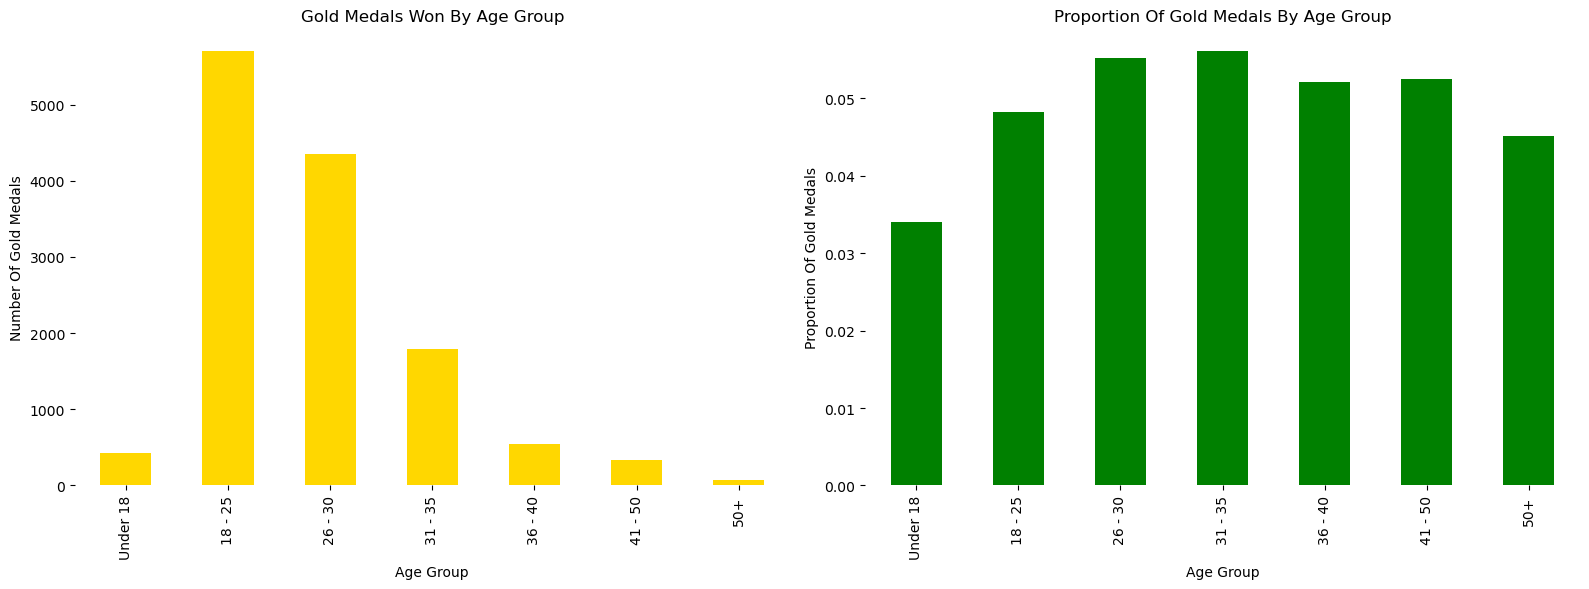

In [229]:
# Count gold medals by age group
gold_medal_counts = gold_medals['age_group'].value_counts().sort_index()

# Count total participants in age group
total_participants = df['age_group'].value_counts().sort_index()

gold_proportion = (gold_medal_counts / total_participants).fillna(0)

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Gold Medals By Age Group
gold_medal_counts = gold_medals['age_group'].value_counts().sort_index()
ax1 = axes[0]
gold_medal_counts.plot(kind='bar', color='gold', ax=ax1)
ax1.set_title('Gold Medals Won By Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number Of Gold Medals')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Plot Proportion Of Gold Medals By Age Group
total_participants = df['age_group'].value_counts().sort_index()
gold_proportion = (gold_medal_counts / total_participants).fillna(0)
ax2 = axes[1]
gold_proportion.plot(kind='bar', color='green', ax=ax2)
ax2.set_title('Proportion Of Gold Medals By Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Proportion Of Gold Medals')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

### 4. Breakdown of medals by sex <a id="q4"></a>

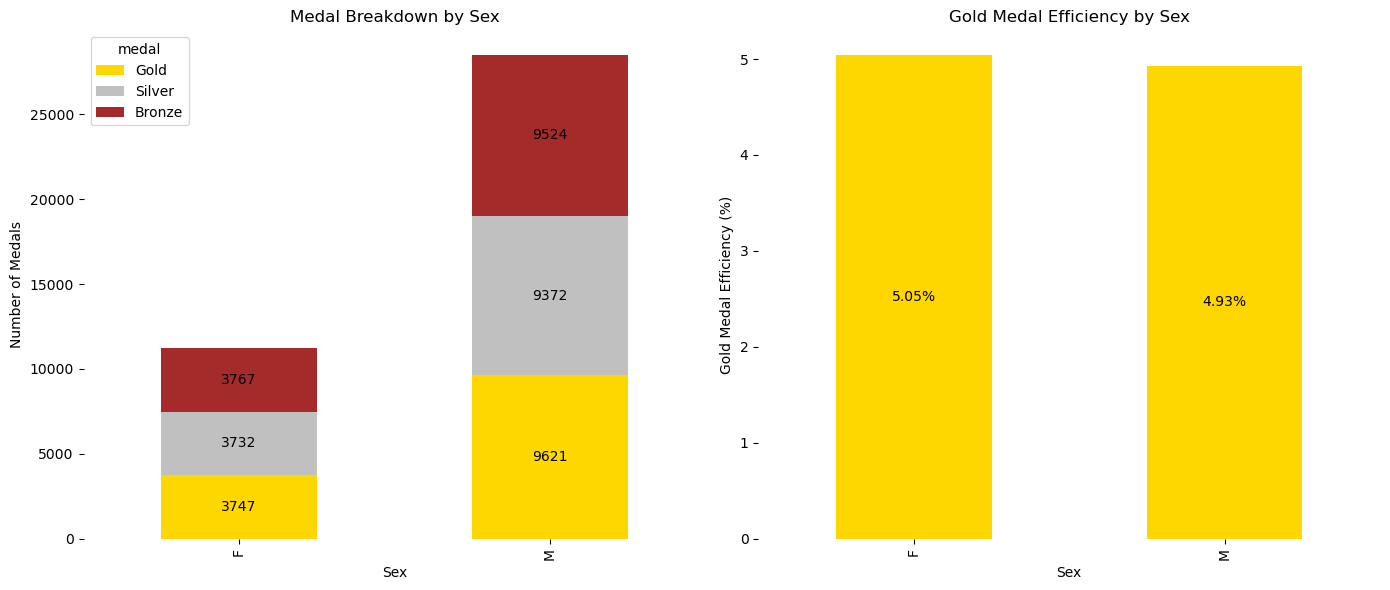

In [232]:
import matplotlib.pyplot as plt

# Prepare data
medals_by_sex = df.groupby(['sex', 'medal']).size().unstack(fill_value=0)
medals_by_sex = medals_by_sex[['Gold', 'Silver', 'Bronze']]

total_participants_by_sex = df.groupby('sex').size()

gold_medal_efficiency = medals_by_sex['Gold'] / total_participants_by_sex * 100

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Medal breakdown by sex
medals_by_sex.plot(kind='bar', stacked=True, ax=ax[0], color=['gold','silver','brown'])
ax[0].set_title('Medal Breakdown by Sex')
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('Number of Medals')

# Remove borders (spines)
for spine in ax[0].spines.values():
    spine.set_visible(False)

# Add data labels
for p in ax[0].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax[0].text(x, y, f'{height:.0f}', ha='center', va='center', fontsize=10, color='black')

# Gold medal efficiency by sex
gold_medal_efficiency.plot(kind='bar', ax=ax[1], color='gold')
ax[1].set_title('Gold Medal Efficiency by Sex')
ax[1].set_xlabel('Sex')
ax[1].set_ylabel('Gold Medal Efficiency (%)')

# Remove borders (spines)
for spine in ax[1].spines.values():
    spine.set_visible(False)

# Add data labels
for p in ax[1].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax[1].text(x, y, f'{height:.2f}%', ha='center', va='center', fontsize=10, color='black')

# Adjust layout and display
plt.tight_layout()
plt.show()


### 5. Number of participants over the years <a id="q5"></a>

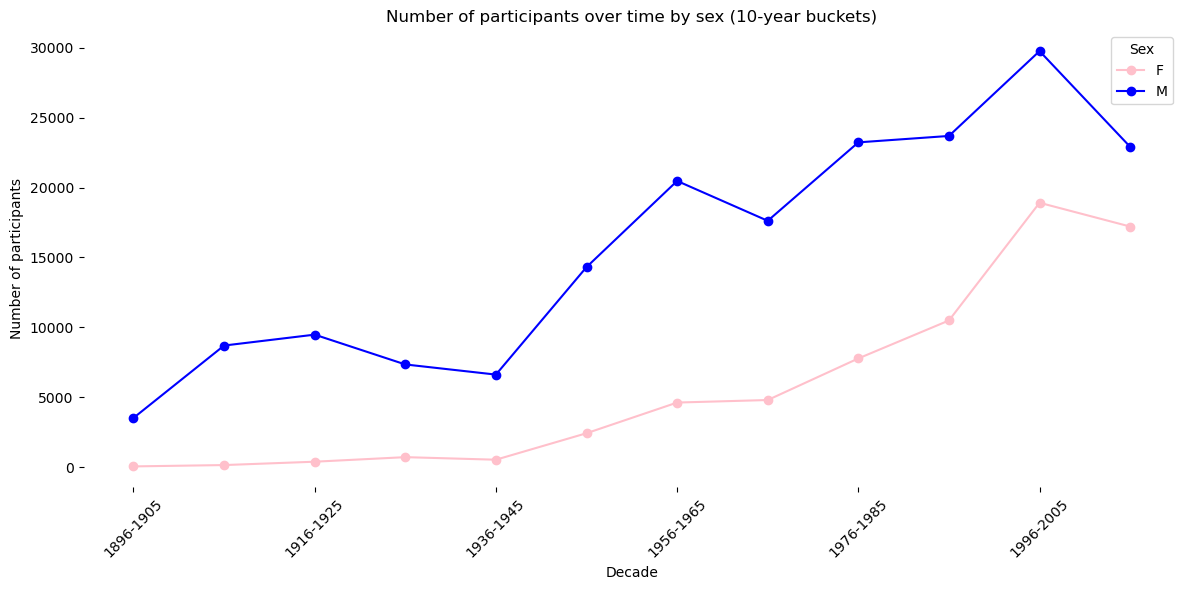

In [235]:
# Create 10 year buckets
df['year_bin'] = pd.cut(df['year'], bins=range(1896, 2017, 10), right=False, 
                        labels=[f"{y}-{y+9}" for y in range(1896, 2016, 10)])

# Group by year_bin and sex, then count participants
participants_by_sex = df.groupby(['year_bin', 'sex'], observed=False).size().unstack(fill_value=0)

ax = participants_by_sex.plot(kind='line', figsize=(12, 6), marker='o', color=['pink', 'blue'])
plt.title('Number of participants over time by sex (10-year buckets)')
plt.xlabel('Decade')
plt.ylabel('Number of participants')
plt.xticks(rotation=45)
plt.legend(title='Sex')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

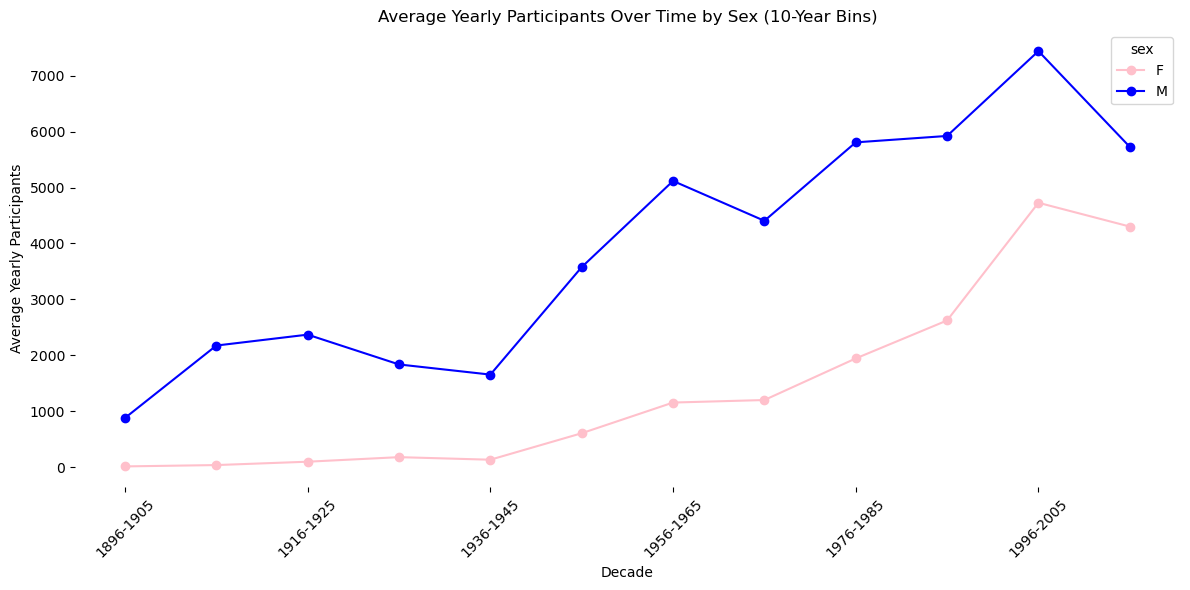

In [237]:
# Calculate the average participants per year for each sex
average_participants_by_sex = participants_by_sex / 4  # Since every 4 years is an Olympics cycle

# Plot as a line chart for each sex
ax = average_participants_by_sex.plot(kind='line', figsize=(12, 6), marker='o', color=['pink', 'blue'])
plt.title('Average Yearly Participants Over Time by Sex (10-Year Bins)')
plt.xlabel('Decade')
plt.ylabel('Average Yearly Participants')
plt.xticks(rotation=45)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

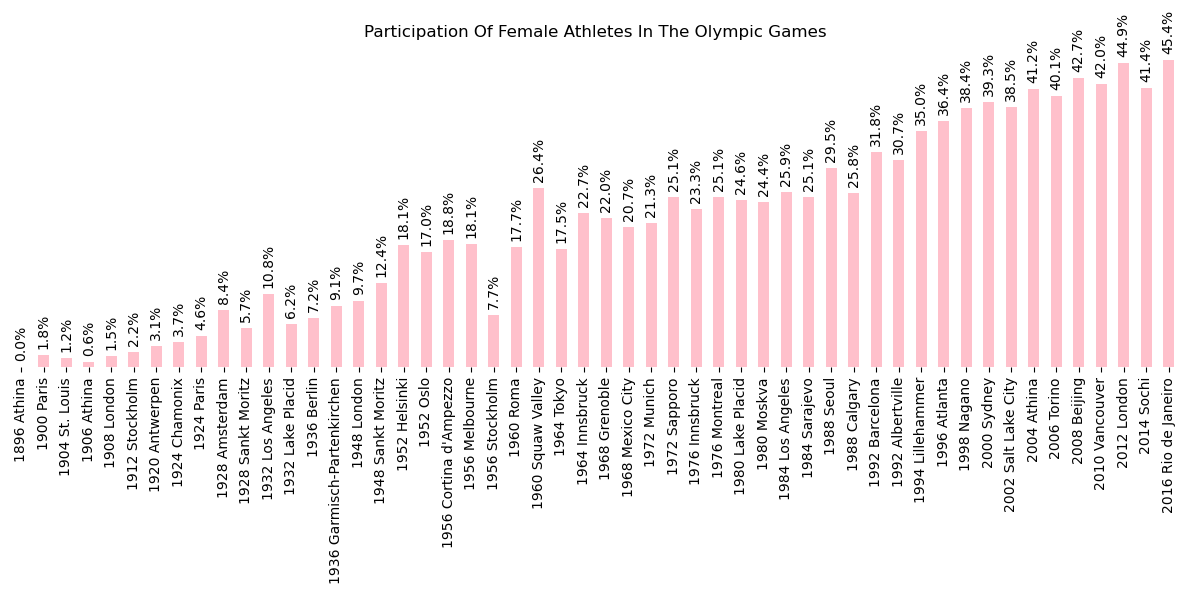

In [239]:
# Calculate gender equality throughout the years

# Group by 'year', 'host_city', and 'sex' to count participants
participants_by_games_and_sex = df.groupby(['year', 'host_city', 'sex']).size().unstack(fill_value=0)

# Calculate total participants per year
participants_by_games_and_sex['total'] = participants_by_games_and_sex.sum(axis=1)

# Calculate percentage of female participants
participants_by_games_and_sex['female_percentage'] = (participants_by_games_and_sex['F'] / participants_by_games_and_sex['total']) * 100

# Sort by year
participants_by_games_and_sex = participants_by_games_and_sex.sort_values(by=['year'], ascending=True)

# Combine year and host_city into a single label
participants_by_games_and_sex['game_label'] = participants_by_games_and_sex.index.map(lambda x: f"{x[0]} {x[1]}")

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
participants_by_games_and_sex['female_percentage'].plot(kind='bar', color='pink', ax=ax)

# Title and axis labels
plt.title('Participation Of Female Athletes In The Olympic Games')
plt.xlabel('')
plt.ylabel('')

# Remove y-axis ticks and labels
plt.yticks([])

# Remove border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add data labels on top of bars with rotation
for i, value in enumerate(participants_by_games_and_sex['female_percentage']):
    ax.text(i, value + 1, f"{value:.1f}%", ha='center', va='bottom', fontsize=10, rotation=90)

# Set x-axis labels
plt.xticks(ticks=range(len(participants_by_games_and_sex)), labels=participants_by_games_and_sex['game_label'], rotation=90)

plt.tight_layout()
plt.show()

Insights & Analysis:

1. Explain the dips, assume to be significant wars such as World War 1, World War 2, Cold War. Have a look at major player participants for those years e.g. US & Russia. Was there any Olympics that were cancelled? Any boycotts?
2. Great to see female participation growing, achieving 50% gender equality in Paris 2024. (Not seen in this dataset).

### 6. How many countries have been in all of the games? <a id="q6"></a>

In [243]:
total_games = df['year'].nunique()

participation_by_region = df.groupby('region')['year'].nunique()

participation_percentage = (participation_by_region / total_games) * 100

participation_df = pd.DataFrame({
    'total_games_participated' : participation_by_region,
    'participation_percentage' : participation_percentage
})

top_10_participation = participation_df.sort_values(by='participation_percentage', ascending=False).head(10)

top_10_participation

,total_games_participated,participation_percentage
region,,
Australia,35,100.000000
France,35,100.000000
Greece,35,100.000000
UK,35,100.000000
Italy,35,100.000000
USA,35,100.000000
Switzerland,35,100.000000
Austria,34,97.142857
Canada,34,97.142857


### 7. Which countries excel in specific sports? <a id="q7"></a>

In [246]:
# Filter data for gold medals in gymnastics and athletics
gold_medals_sports = df[(df['medal'] == 'Gold') & (df['sport'].isin(['Gymnastics', 'Athletics']))]

# Drop duplicates to account for team events
unique_gold_medals = gold_medals_sports.drop_duplicates(subset=['year', 'region', 'sport', 'event'])

# Group by region and sport to count gold medals
gold_medals_by_region_sport = unique_gold_medals.groupby(['region', 'sport']).size()

# Count total participants by region and sport
total_participants_by_region_sport = df.groupby(['region', 'sport']).size()

# Combine into a single DataFrame
region_sport_stats = pd.DataFrame({
    'gold_medals': gold_medals_by_region_sport,
    'total_participants': total_participants_by_region_sport
}).fillna(0)

# Calculate the gold medal percentage (gold_medals / total_participants * 100)
region_sport_stats['gold_medal_percentage'] = (region_sport_stats['gold_medals'] / region_sport_stats['total_participants']) * 100

# Separate the data for gymnastics and athletics
gymnastics_stats = region_sport_stats[region_sport_stats.index.get_level_values('sport') == 'Gymnastics']
athletics_stats = region_sport_stats[region_sport_stats.index.get_level_values('sport') == 'Athletics']

# Sort by gold medals and get top 5 entries for each sport
top_5_gymnastics = gymnastics_stats.sort_values(by='gold_medals', ascending=False).head(5)
top_5_athletics = athletics_stats.sort_values(by='gold_medals', ascending=False).head(5)

# Combine the top 5 gymnastics and athletics stats
top_10_stats = pd.concat([top_5_gymnastics, top_5_athletics])

# Display the result as a table
print(top_10_stats[['gold_medals', 'total_participants', 'gold_medal_percentage']])

                    gold_medals  total_participants  gold_medal_percentage
region  sport                                                             
Russia  Gymnastics         90.0                1289               6.982157
USA     Gymnastics         35.0                2013               1.738698
Japan   Gymnastics         31.0                1216               2.549342
China   Gymnastics         26.0                 650               4.000000
Romania Gymnastics         24.0                1172               2.047782
USA     Athletics         344.0                3211              10.713173
Russia  Athletics          97.0                1573               6.166561
Germany Athletics          72.0                2020               3.564356
UK      Athletics          59.0                2244               2.629234
Finland Athletics          49.0                 912               5.372807


In [248]:
# Filter for USA's gold medals only and drop duplicates in team events
usa_gold_medals = df[(df['region'] == 'USA') & (df['medal'] == 'Gold')]

# Drop duplicates to account for team events
unique_usa_gold_medals = usa_gold_medals.drop_duplicates(subset=['year', 'region', 'sport', 'event'])

# Group by sport and count the number of gold medals
usa_gold_medals_by_sport = unique_usa_gold_medals.groupby('sport').size()

# Filter for USA's silver medals only and drop duplicates in team events
usa_silver_medals = df[(df['region'] == 'USA') & (df['medal'] == 'Silver')]

# Drop duplicates to account for team events
unique_usa_silver_medals = usa_silver_medals.drop_duplicates(subset=['year', 'region', 'sport', 'event'])

# Group by sport and count the number of silver medals
usa_silver_medals_by_sport = unique_usa_silver_medals.groupby('sport').size()

# Filter for USA's bronze medals only and drop duplicates in team events
usa_bronze_medals = df[(df['region'] == 'USA') & (df['medal'] == 'Bronze')]

# Drop duplicates to account for team events
unique_usa_bronze_medals = usa_bronze_medals.drop_duplicates(subset=['year', 'region', 'sport', 'event'])

# Group by sport and count the number of bronze medals
usa_bronze_medals_by_sport = unique_usa_bronze_medals.groupby('sport').size()

# Combine the results for gold, silver, and bronze medals
usa_medals_by_sport = pd.DataFrame({
    'Gold': usa_gold_medals_by_sport,
    'Silver': usa_silver_medals_by_sport,
    'Bronze': usa_bronze_medals_by_sport
}).fillna(0)

# Calculate the total number of medals per sport
usa_medals_by_sport['total_medals'] = usa_medals_by_sport.sum(axis=1)

# Sort by the number of gold medals in descending order
usa_medals_by_sport_sorted = usa_medals_by_sport.sort_values(by='Gold', ascending=False)

# Display the result
print(usa_medals_by_sport_sorted[['Gold', 'Silver', 'Bronze', 'total_medals']].head(10))

                Gold  Silver  Bronze  total_medals
sport                                             
Athletics      344.0   262.0   210.0         816.0
Swimming       246.0   170.0   134.0         550.0
Shooting        54.0    29.0    27.0         110.0
Wrestling       52.0    42.0    34.0         128.0
Boxing          50.0    24.0    39.0         113.0
Diving          48.0    43.0    44.0         135.0
Gymnastics      35.0    42.0    36.0         113.0
Rowing          33.0    32.0    24.0          89.0
Speed Skating   29.0    19.0    16.0          64.0
Basketball      23.0     2.0     3.0          28.0


### 8. Which athletes have won the most gold medals? <a id="q8"></a>

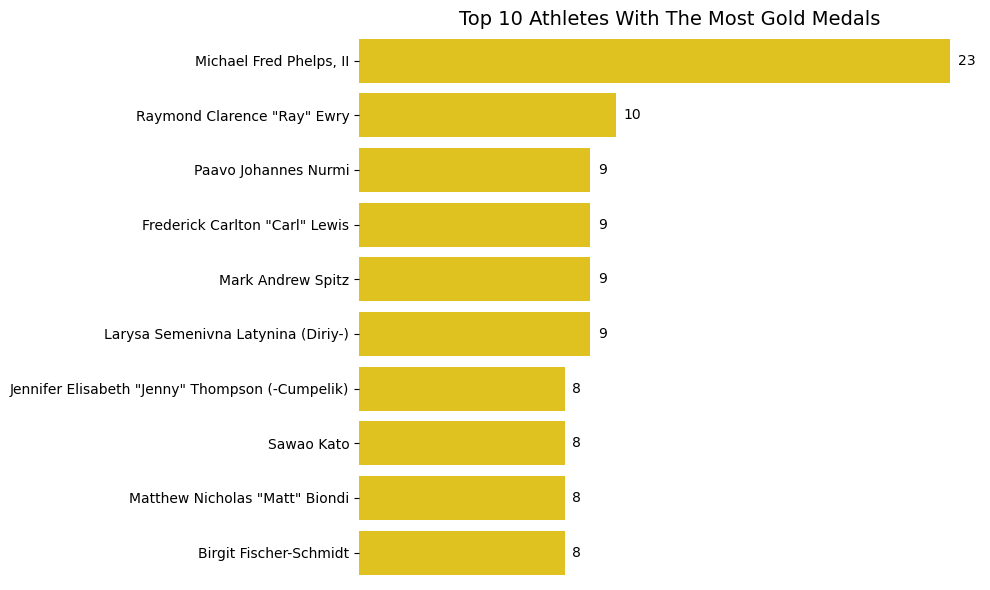

In [251]:
gold_medals = df[df['medal'] == 'Gold']

athlete_gold_counts = gold_medals.groupby('name').size()

top10_athletes = athlete_gold_counts.sort_values(ascending=False).head(10)

top10_athletes_df = top10_athletes.reset_index()
top10_athletes_df.columns = ['athlete', 'gold_medal_count']

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'gold_medal_count',
    y = 'athlete',
    data = top10_athletes_df,
    color = 'gold'
)

# Remove the x-axis label and numbers
plt.xlabel('')  # Remove x-axis label
plt.xticks([])  # Remove x-axis numbers

# Remove the plot border (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Athletes With The Most Gold Medals', fontsize = 14)

for index, value in enumerate(top10_athletes_df['gold_medal_count']):
    plt.text(
        value + 0.3,
        index,
        str(value),
        color = 'black',
        ha = 'left',
        va = 'center',
        fontsize = 10  
    )

plt.tight_layout()
plt.show()

Insights & Analysis:

1. Michael Phelps, swimmer, bringing in a total of 23 gold medals. How many even has he participated in vs. Raymond Ewry?

# Step 9. Statistical Analysis